---
# <div align="center"><font color='black'>Traffic Sign Recognition Machine Learning Project</font></div>

---

# Introduction

## Project: Classify Images of Road Traffic Signs

Using the traffic signs dataset that consists of 28x28 grey-scale images two taks must be performed: 
- Classify images according to sign-shape, such as diamond, hex, rectangle, round, triangle.
- Classify images according to sign-type, such as stop, speed, warning, parking, etc.

# Reading Data

Here we will read the data which is a csv file which contains the image paths, shape and type. We will also split the data for training and validation. The DefImgPath Column will be dropped, this column just contains the default path of the images that is before it was edited so it can be read.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./trafficsigns_data.csv')
data.drop("DefImgPath", axis=1, inplace=True)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 2219, Val Data: 740, Test Data: 740


## Exploratory Data Analysis (EDA)

In [2]:
print("Traffic Signs Train Data Frame")
train_data.shape

Traffic Signs Train Data Frame


(2219, 3)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 3009 to 2157
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImgPath  2219 non-null   object
 1   Shape    2219 non-null   object
 2   Type     2219 non-null   object
dtypes: object(3)
memory usage: 69.3+ KB


In [4]:
print("Traffic Signs Test Data Frame")
test_data.shape

Traffic Signs Test Data Frame


(740, 3)

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 1042 to 2886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImgPath  740 non-null    object
 1   Shape    740 non-null    object
 2   Type     740 non-null    object
dtypes: object(3)
memory usage: 23.1+ KB


In [6]:
print("Traffic Signs Test Validation Frame")
val_data.shape

Traffic Signs Test Validation Frame


(740, 3)

In [7]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 2296 to 3439
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImgPath  740 non-null    object
 1   Shape    740 non-null    object
 2   Type     740 non-null    object
dtypes: object(3)
memory usage: 23.1+ KB


Traffic Sign Shapes


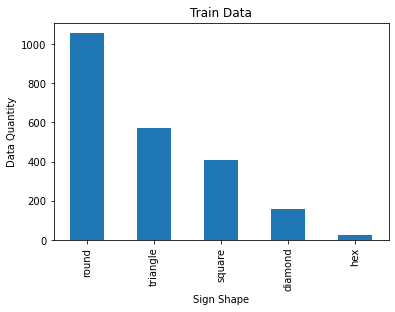

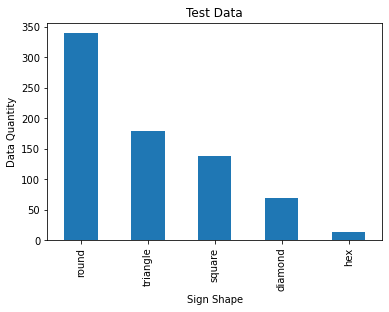

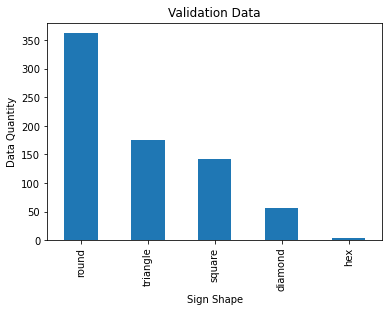

In [8]:
fig, ax = plt.subplots()
plt.title("Train Data")
plt.xlabel("Sign Shape")
plt.ylabel("Data Quantity")
train_data['Shape'].value_counts().plot(ax=ax, kind='bar')

fig, ax = plt.subplots()
plt.title("Test Data")
plt.xlabel("Sign Shape")
plt.ylabel("Data Quantity")
test_data['Shape'].value_counts().plot(ax=ax, kind='bar')

fig, ax = plt.subplots()
plt.title("Validation Data")
plt.xlabel("Sign Shape")
plt.ylabel("Data Quantity")
val_data['Shape'].value_counts().plot(ax=ax, kind='bar')

print("Traffic Sign Shapes")

Judging by the bar graphs above it can be seen that the data sample distribution for each traffic sign shape is not evenly distributed. The round sign shapes have the most quantity and the hexagon sing shapes with the least. A reason for this could be that some sign shapes contain more different types of signs than others which means they will be more common. Because of the uneven distribution there may be more bias towards the larger sample shapes for the image classification models.

Traffic Sign Types


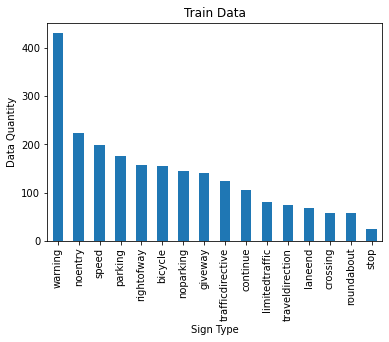

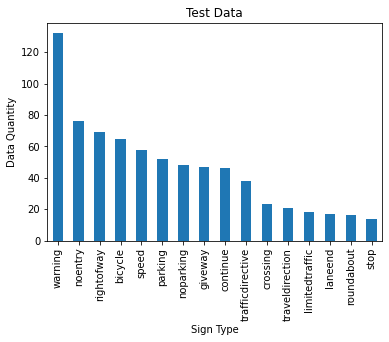

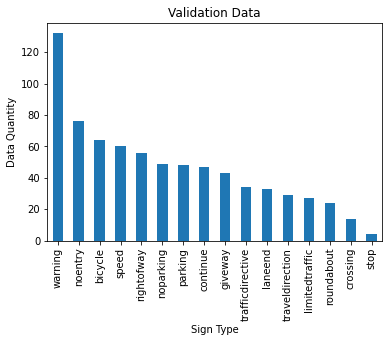

In [9]:
fig, ax = plt.subplots()
plt.title("Train Data")
plt.xlabel("Sign Type")
plt.ylabel("Data Quantity")
train_data['Type'].value_counts().plot(ax=ax, kind='bar')

fig, ax = plt.subplots()
plt.title("Test Data")
plt.xlabel("Sign Type")
plt.ylabel("Data Quantity")
test_data['Type'].value_counts().plot(ax=ax, kind='bar')

fig, ax = plt.subplots()
plt.title("Validation Data")
plt.xlabel("Sign Type")
plt.ylabel("Data Quantity")
val_data['Type'].value_counts().plot(ax=ax, kind='bar')

print("Traffic Sign Types")

Similar to the graphs for the traffic sign shape, the traffic sign type sample distribution is not evenly distributed. This may also result in uneven distribution and there may be more bias towards the larger sample types for the image classification models.

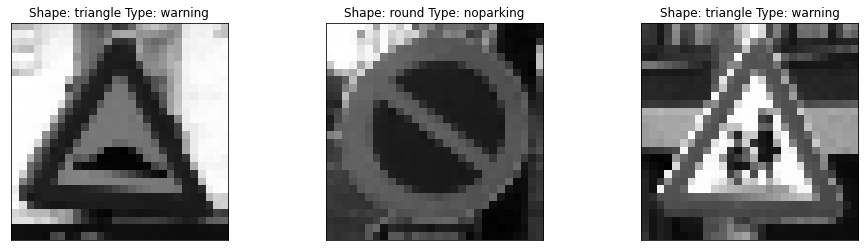

In [10]:
plt.figure(figsize=(16,4))
import matplotlib.image as mpimg
img = mpimg.imread(train_data['ImgPath'].iloc[100])
plt.subplot(1,3,1).set_title('Shape: ' + train_data['Shape'].iloc[100] + ' Type: ' + train_data['Type'].iloc[100])
imgplot = plt.imshow(img, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


img = mpimg.imread(test_data['ImgPath'].iloc[100])
plt.subplot(1,3,2)
plt.subplot(1,3,2).set_title('Shape: ' + test_data['Shape'].iloc[100] + ' Type: ' + test_data['Type'].iloc[100])
imgplot = plt.imshow(img, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)



img = mpimg.imread(val_data['ImgPath'].iloc[100])
plt.subplot(1,3,3)
plt.subplot(1,3,3).set_title('Shape: ' + val_data['Shape'].iloc[100] + ' Type: ' + val_data['Type'].iloc[100])
imgplot = plt.imshow(img, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

The goal to use a model to predict the shape and type of signs from the database. The shape and type of sign are labeled above. From these images we can see that the sign shape corresponds to the shape that is labeled and the same for the sign type. This task is multi-class classification therefore a performance measure such as accuracy is appropriate for this task.

# Model development

A learning curve will be used plot the results of the model training process.

In [11]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

## Traffic Signs Shape MLP Model
## Base Model

A simple MLP will be setup to use as our model. The hidden layer dimension will be set to 256. The reason why I chose MLP because it's a very flexible model which can be applied to various types of data such as images. A model for classifying the traffic signs shape will be made first.

In [21]:
SHAPE_INPUT_DIM = (28,28,3)
SHAPE_HIDDEN_LAYER_DIM = 256
SHAPE_OUTPUT_CLASSES = 5

First we'll add a flatten layer and then add 2 dense layers. 

In [22]:
import tensorflow as tf

shape_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=SHAPE_INPUT_DIM),
    tf.keras.layers.Dense(SHAPE_HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(SHAPE_OUTPUT_CLASSES)
])

In [23]:
shape_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               602368    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 603,653
Trainable params: 603,653
Non-trainable params: 0
_________________________________________________________________


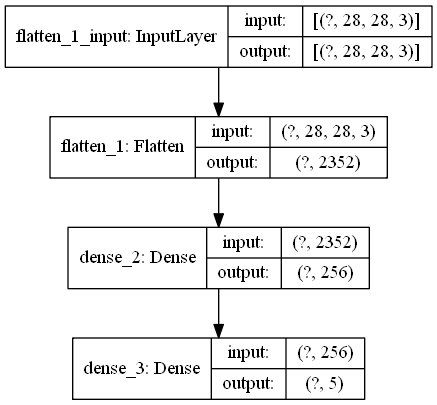

In [24]:
tf.keras.utils.plot_model(shape_model, show_shapes=True)

In [25]:
shape_model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

## Training the Model

In [26]:
train_data['Shape'] = train_data['Shape'].astype('str')
val_data['Shape'] = val_data['Shape'].astype('str')

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="ImgPath",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="ImgPath",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


In [19]:
history = shape_model.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

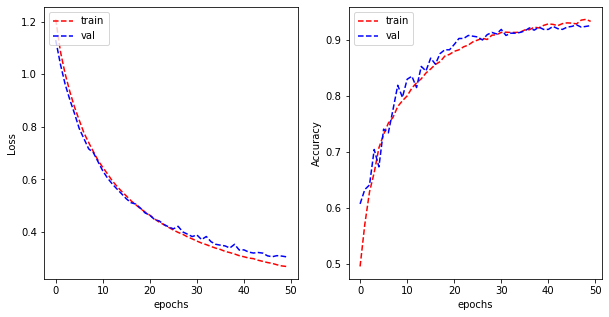

In [20]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

From the learning curve plotted above, it seems as if this model is under fitting. In order to tune the model to fix this under fitting issue, the epochs parameter will be increased.

In [28]:
history = shape_model.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

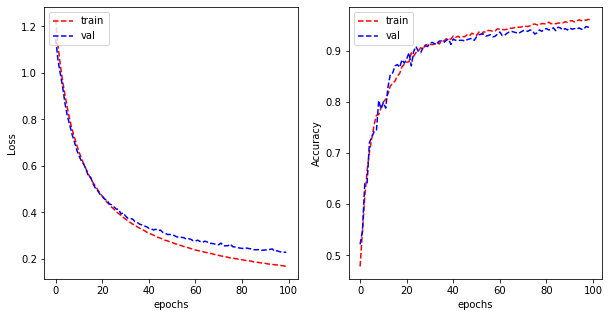

In [29]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

The model is now more balanced.

## Testing Model

The Model will now be tested.

In [30]:
test_data['Shape'] = test_data['Shape'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="ImgPath",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 5 classes.


In [31]:
shape_model.evaluate(test_generator)

740/740 [==============================] - 4s 5ms/step - loss: 0.2736 - categorical_accuracy: 0.9135


[0.2736213803291321, 0.9135135412216187]

From the evaluation above it is shown that the model has an accuracy of 91.35% which is really good.

## Shape Results
The visualisation of the results will be plotted below.

In [32]:
label_names = {'diamond' : 0, 'hex' : 1, 'round' : 2, 'square' : 3, 'triangle' : 4}

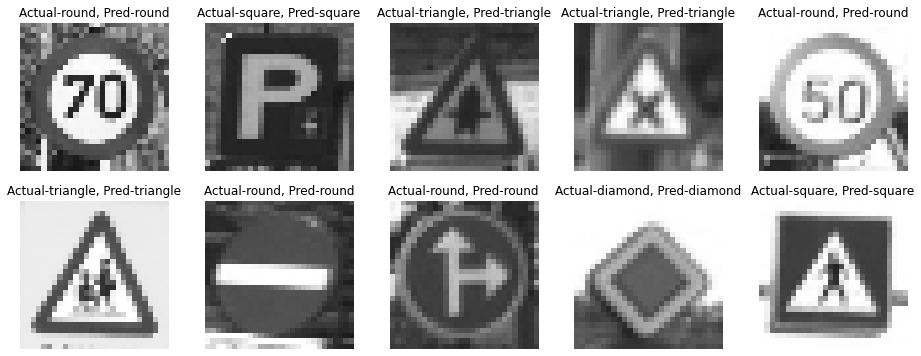

In [33]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,6))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = shape_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 11:
            plt.subplot(2,5,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

## Traffic Signs Shape CNN Model
Now we will use a CNN model instead to see how it performs compared to MLP for classifying traffic sign shape. I've decided to now use CNN because it is often used for classifying images.

In [34]:
from tensorflow.keras import datasets, layers, models

SHAPE_INPUT_DIM = (28,28,3)

shape_cnn_model = models.Sequential()
shape_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=SHAPE_INPUT_DIM))
shape_cnn_model.add(layers.MaxPooling2D((2, 2)))
shape_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
shape_cnn_model.add(layers.MaxPooling2D((2, 2)))
shape_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
shape_cnn_model.add(layers.Flatten())
shape_cnn_model.add(layers.Dense(64, activation='relu'))
shape_cnn_model.add(layers.Dense(5))

In [35]:
shape_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

The model will now be compiled and trained.

In [36]:
shape_cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="ImgPath",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="ImgPath",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


In [38]:
history = shape_cnn_model.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

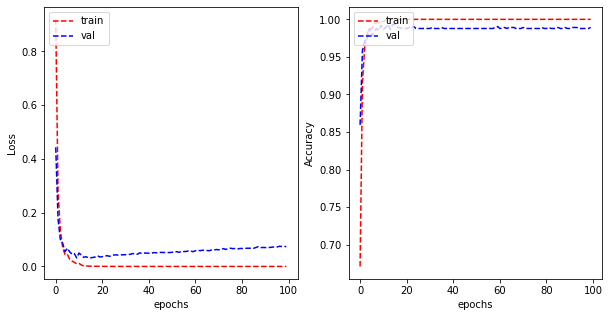

In [39]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## CNN Testing Model

In [40]:
test_data['Shape'] = test_data['Shape'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="ImgPath",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 5 classes.


In [41]:
shape_cnn_model.evaluate(test_generator)

740/740 [==============================] - 1s 1ms/step - loss: 0.0494 - categorical_accuracy: 0.9905


[0.04943644627928734, 0.9905405640602112]

Judging by the model evaluation from above it can be justified that CNN will be a better model than MLP for classifying the traffic signs shape because it has a higher accuracy score than MLP with a 99.05% accuracy compared to MLP's 91.35%. 

## CNN Shape Results

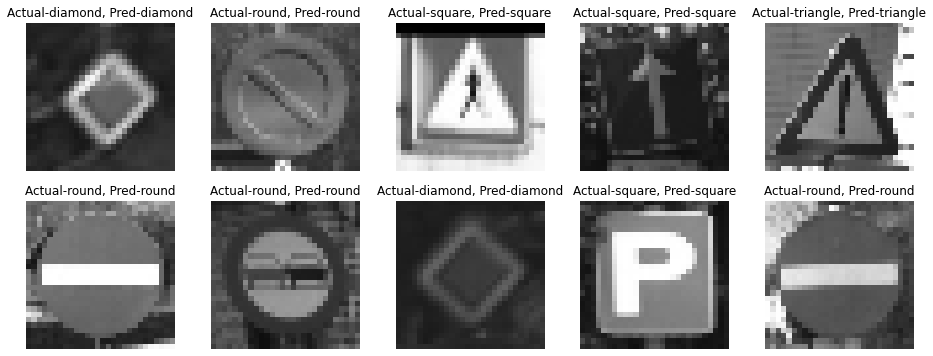

In [42]:
label_names = {'diamond' : 0, 'hex' : 1, 'round' : 2, 'square' : 3, 'triangle' : 4}
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,6))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = shape_cnn_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 11:
            plt.subplot(2,5,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

# Traffic Signs Type MLP Model
## Base Model

An MLP model will be setup for the Traffic Signs type. The hidden layer will also be set to 256.

In [72]:
TYPE_INPUT_DIM = (28,28,3)
TYPE_HIDDEN_LAYER_DIM = 256
TYPE_OUTPUT_CLASSES = 16

In [73]:
import tensorflow as tf

type_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=TYPE_INPUT_DIM),
    tf.keras.layers.Dense(TYPE_HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(TYPE_OUTPUT_CLASSES)
])

In [74]:
type_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               602368    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                4112      
Total params: 606,480
Trainable params: 606,480
Non-trainable params: 0
_________________________________________________________________


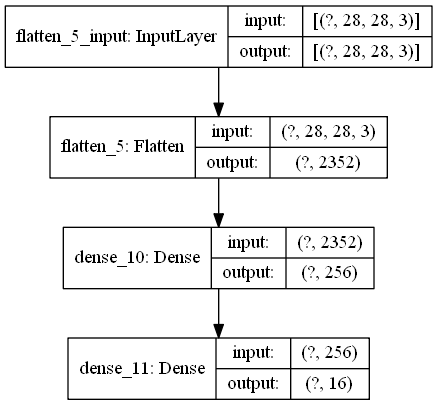

In [75]:
tf.keras.utils.plot_model(type_model, show_shapes=True)

In [76]:
type_model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

## Training the Model

In [77]:
train_data['Type'] = train_data['Type'].astype('str')
val_data['Type'] = val_data['Type'].astype('str')

In [78]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="ImgPath",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="ImgPath",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


In [79]:
history = type_model.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

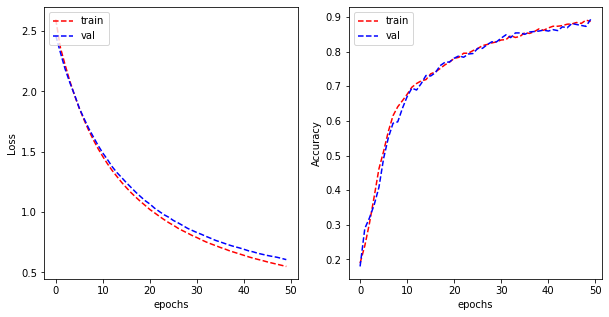

In [80]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

Judging by the learning curves plotted above it seems as if the model is perfectly balanced so the parameters won't need to be adjusted.

## MLP Testing Model

In [81]:
test_data['Type'] = test_data['Type'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="ImgPath",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 16 classes.


In [82]:
type_model.evaluate(test_generator)

740/740 [==============================] - 1s 1ms/step - loss: 0.6298 - categorical_accuracy: 0.8716


[0.6297797560691833, 0.8716216087341309]

## MLP Type Results

In [83]:
label_names = {'bicycle' : 0, 'continue' : 1, 'crossing' : 2,  'giveway' : 3, 'laneend' : 4, 'limitedtraffic' : 5, 'noentry' : 6, 'noparking' : 7, 'parking' : 8, 'rightofway' : 9, 'roundabout' : 10, 'speed' : 11, 'stop' : 12, 'trafficdirective' : 13, 'traveldirection' : 14, 'warning' : 15}

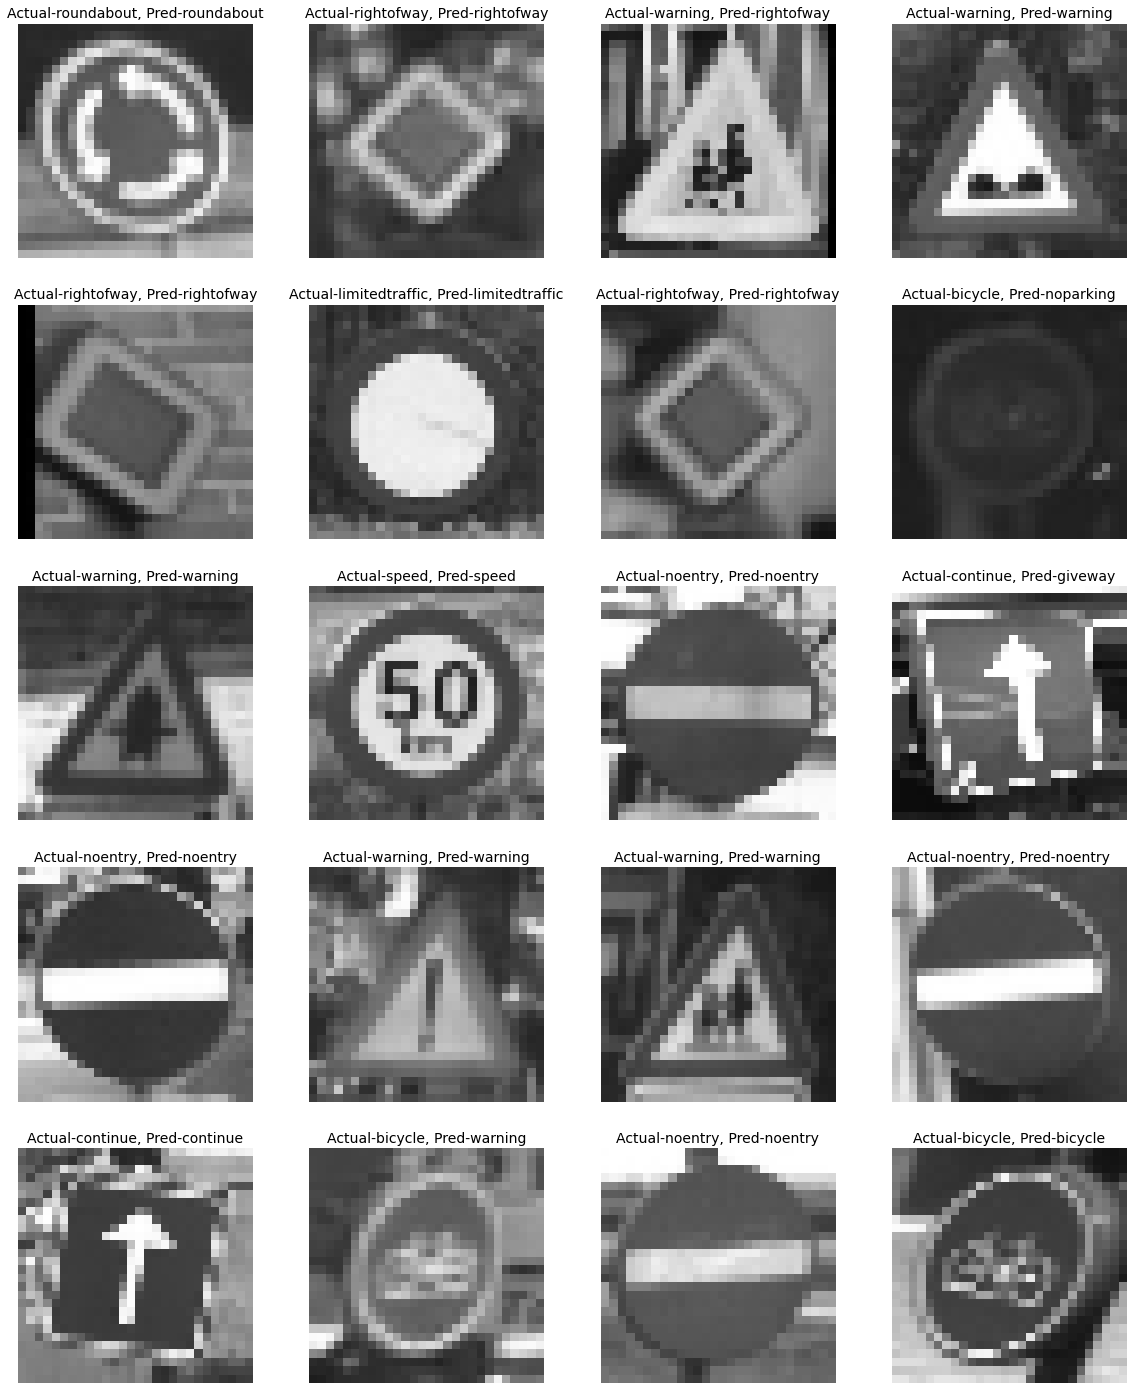

In [87]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(20,25))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = type_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches <= 4:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ), fontsize=14)
        if batches <= 8:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ), fontsize=14)
        if batches <= 12:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ), fontsize=14)
        if batches <= 16:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ), fontsize=14)
        if batches <= 20:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ), fontsize=14)
            
        else:
            break
        
        plt.axis('off')

## Traffic Signs Type CNN Model
Now we will use a CNN model instead to see how it performs compared to MLP for classifying traffic sign shape. We will use the same model we used for classifying the traffic sign shapes.

In [88]:
TYPE_INPUT_DIM = (28,28,3)

type_cnn_model = models.Sequential()
type_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=TYPE_INPUT_DIM))
type_cnn_model.add(layers.MaxPooling2D((2, 2)))
type_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
type_cnn_model.add(layers.MaxPooling2D((2, 2)))
type_cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
type_cnn_model.add(layers.Flatten())
type_cnn_model.add(layers.Dense(64, activation='relu'))
type_cnn_model.add(layers.Dense(16))

In [89]:
type_cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [90]:
type_cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [91]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="ImgPath",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="ImgPath",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


In [92]:
history = type_cnn_model.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

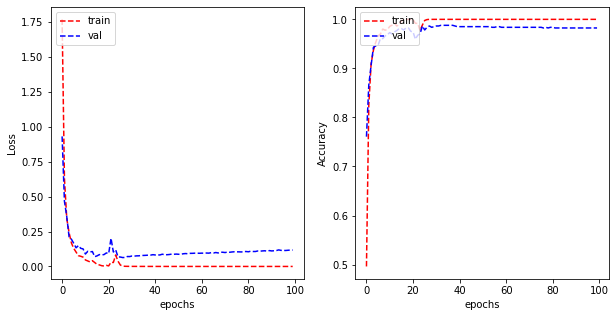

In [93]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## CNN Testing Model

In [94]:
test_data['Type'] = test_data['Type'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="ImgPath",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 16 classes.


In [95]:
type_cnn_model.evaluate(test_generator)

740/740 [==============================] - 1s 1ms/step - loss: 0.0947 - categorical_accuracy: 0.9838


[0.09469806402921677, 0.9837837815284729]

Judging by the CNN model evaluation from above it can be justified that CNN will be a better model than MLP for classifying the traffic signs type because it has a higher accuracy score than MLP with a 98.38% accuracy compared to MLP's 87.16%. The CNN model won't need any adjusting because it scored high accuracy.

## CNN Type Results

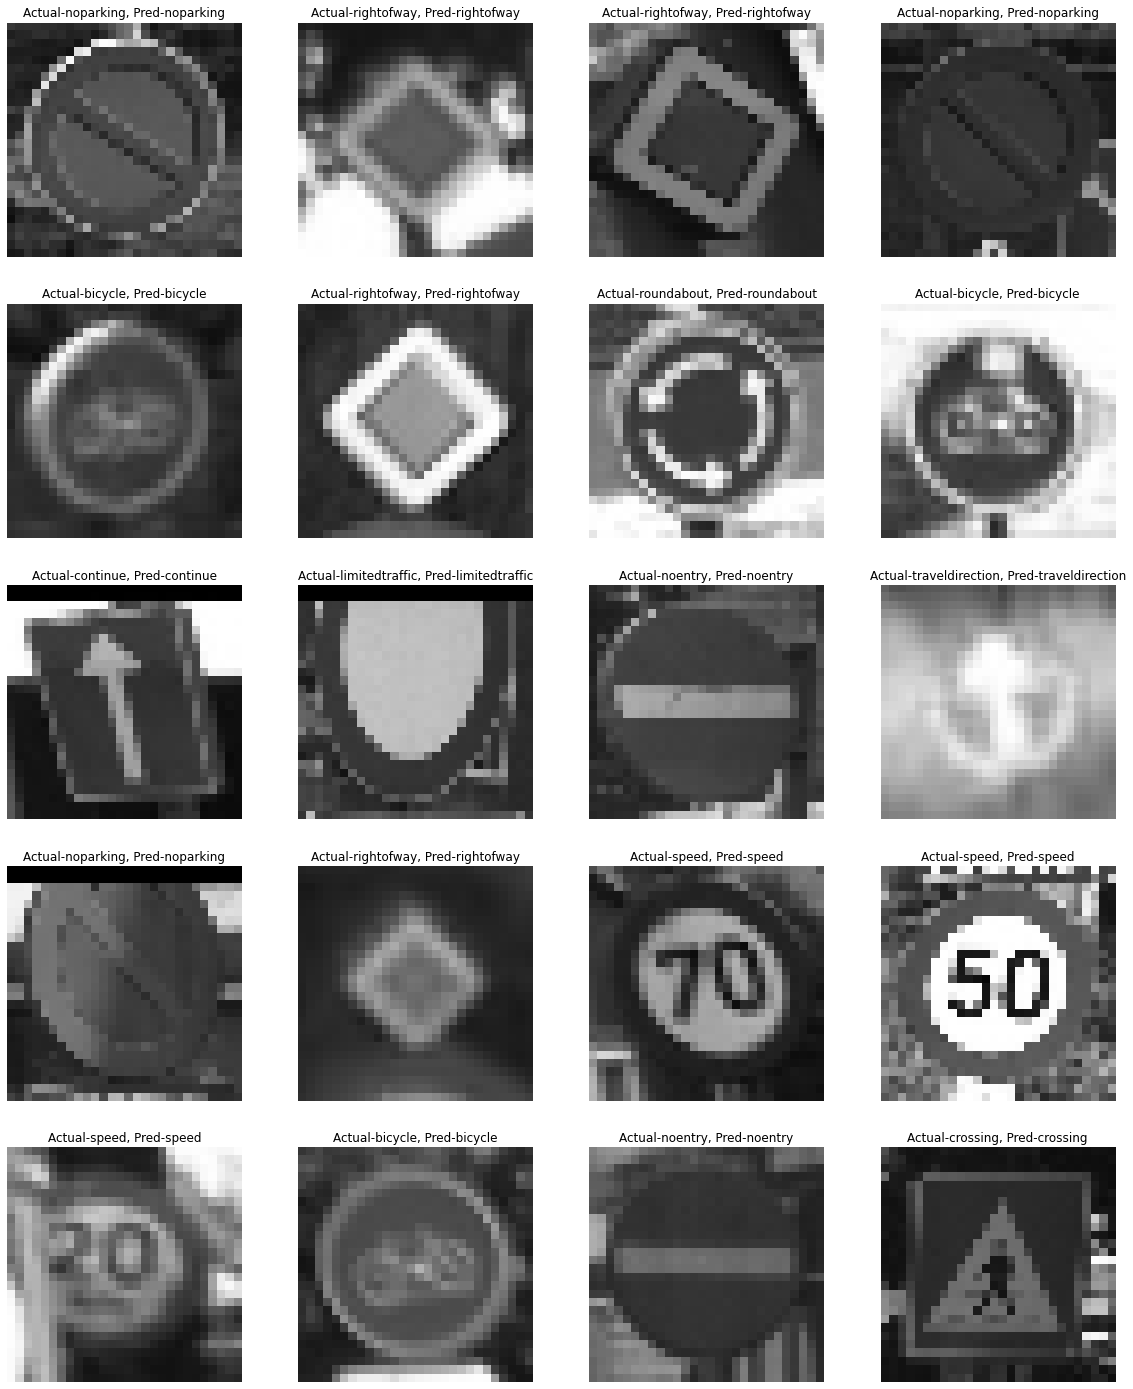

In [96]:
label_names = {'bicycle' : 0, 'continue' : 1, 'crossing' : 2,  'giveway' : 3, 'laneend' : 4, 'limitedtraffic' : 5, 'noentry' : 6, 'noparking' : 7, 'parking' : 8, 'rightofway' : 9, 'roundabout' : 10, 'speed' : 11, 'stop' : 12, 'trafficdirective' : 13, 'traveldirection' : 14, 'warning' : 15}
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(20,25))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = type_cnn_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches <= 4:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
        if batches <= 8:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
        if batches <= 12:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
        if batches <= 16:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
        if batches <= 20:
            plt.subplot(5,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

## Conclusion
In conclusion the Convolutional Neural Network (CNN) model is a better suited model when classifying different shapes and types of traffic signs than other models such as MLP because it has an almost 100% accuracy.

## Independent Evaluation 

For my independent evaluation I have collected 16 different photos of traffic signs and process these images in order to be used for these trained algorithms. I will use the CNN models for both the sign type and shape.

## Traffic Sign Shape
First we will classify the traffic sign shapes.

In [65]:
independent_data = pd.read_csv('./independent_data.csv')

independent_data['Shape'] = independent_data['Shape'].astype('str')
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=independent_data,
        directory='./',
        x_col="ImgPath",
        y_col="Shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 16 validated image filenames belonging to 5 classes.


In [66]:
shape_cnn_model.evaluate(test_generator)

16/16 [==============================] - 0s 4ms/step - loss: 0.2744 - categorical_accuracy: 0.9375


[0.2743951976299286, 0.9375]

The evaluation of the CNN model with the data from my independent data results with an accuracy of 93.75%. This isn't as high as to when it was evaluated with the test data. This could be because there are only 16 photos used in this dataframe. 

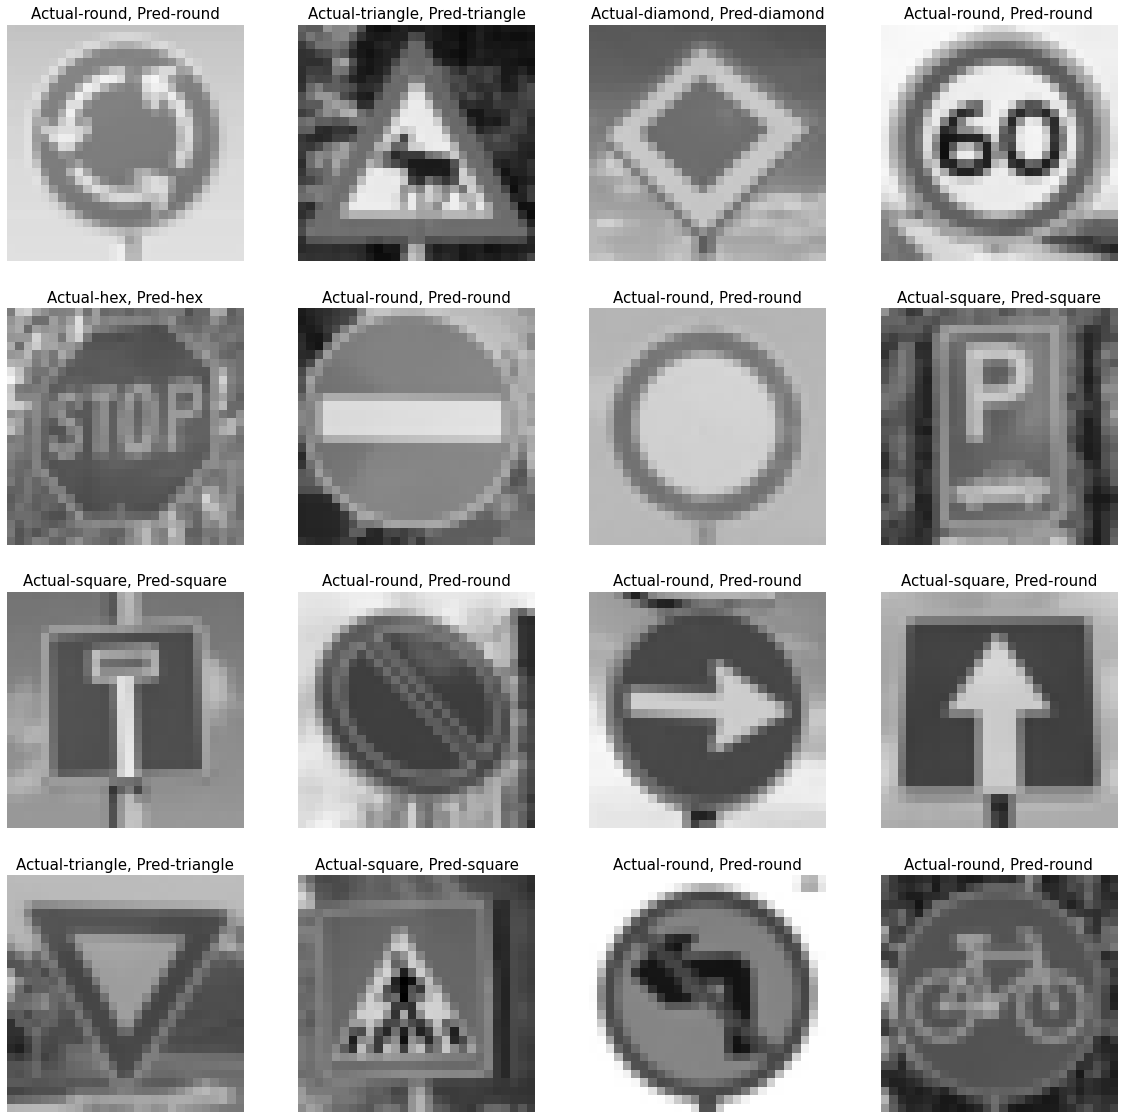

In [67]:
label_names = {'diamond' : 0, 'hex' : 1, 'round' : 2, 'square' : 3, 'triangle' : 4}
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(20,20))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = shape_cnn_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches <= 16:
            plt.subplot(4,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ), fontsize=15)
            
        else:
            break
        
        plt.axis('off')

## Traffic Sign Type

In [97]:
independent_data = pd.read_csv('./independent_data.csv')
independent_data['Type'] = independent_data['Type'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=independent_data,
        directory='./',
        x_col="ImgPath",
        y_col="Type",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 16 validated image filenames belonging to 16 classes.


In [98]:
type_cnn_model.evaluate(test_generator)

16/16 [==============================] - 0s 1ms/step - loss: 5.0052 - categorical_accuracy: 0.6875


[5.00516939163208, 0.6875]

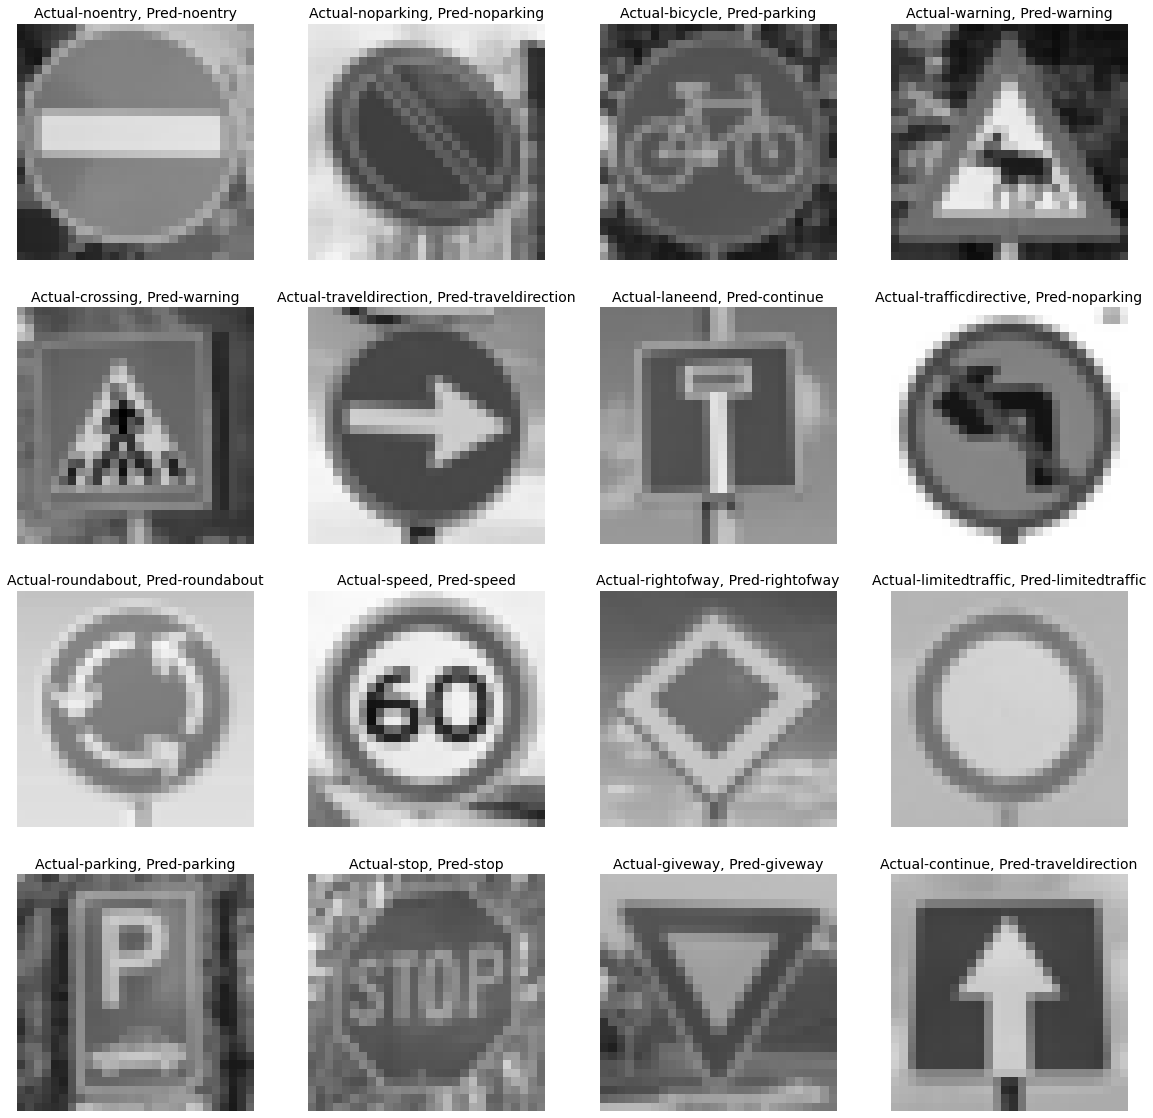

In [99]:
label_names = {'bicycle' : 0, 'continue' : 1, 'crossing' : 2,  'giveway' : 3, 'laneend' : 4, 'limitedtraffic' : 5, 'noentry' : 6, 'noparking' : 7, 'parking' : 8, 'rightofway' : 9, 'roundabout' : 10, 'speed' : 11, 'stop' : 12, 'trafficdirective' : 13, 'traveldirection' : 14, 'warning' : 15}
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(20,20))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = type_cnn_model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches <= 16:
            plt.subplot(4,4,batches)
            plt.imshow(x)
            plt.title("Actual-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ), fontsize=14)
            
        else:
            break
        
        plt.axis('off')